In [1]:
import csv, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def sin_series(T):
    sins = []
    for i in range(T):
        sins.append(math.sin(i))
    return sins

In [2]:
def diff(s):
    result = []
    for i in range(1, len(s)):
        result.append(s[i]-s[i-1])
    return result

In [3]:
def cosh(x):
    return ((np.power(math.e, x)+np.power(math.e, -x))/2)

In [4]:
def rsi_approx(s_diff, t, T):
    s_diff_diff = s_diff[t] - s_diff[t-T]
    ln_diff = np.log(cosh(s_diff[t])) - np.log(cosh(s_diff[t-T]))
    if ln_diff != 0:
        return 50*(1+s_diff_diff/ln_diff)
    else:
        return 50*(1+s_diff_diff/1+ln_diff)

In [5]:
# def rsi_approx(s_diff, t, T):
#     s_diff_sum = 0.0
#     ln_sum = 0.0
#     for i in range(t-T, t):
#         s_diff_sum += s_diff[i]
#         ln_sum += np.log(cosh(s_diff[i]))
#     return 50*(1+s_diff_sum/ln_sum)

In [6]:
def U(s, t, T):
    u_sum = 0.0
    for i in range(t-T, t):
        diff = s[i]-s[i-1]
        if diff > 0:
            u_sum += diff
    return u_sum/T

In [7]:
def D(s, t, T):
    d_sum = 0.0
    for i in range(t-T, t):
        diff = s[i-1]-s[i]
        if diff > 0:
            d_sum += diff
    return d_sum/T

In [8]:
def rsi(s, t, T):
    Ut = U(s, t, T)
    Dt = D(s, t, T)
    return 100*(Ut/(Ut+Dt))

In [9]:
df_apple = pd.read_csv('../data/apple_prices.csv', names=['Price'], header=None)
apple = df_apple.Price.tolist()

In [10]:
T = 10

In [11]:
apple_diff = diff(apple)
len(apple_diff)

1257

In [12]:
apple_rsi_approx = []
for i in range(len(apple_diff)):
    apple_rsi_approx.append(rsi_approx(apple_diff, i, T))
len(apple_rsi_approx)

1257

In [13]:
apple_rsi = []
for i in range(len(apple)):
    apple_rsi.append(rsi(apple, i, T))
apple_rsi = apple_rsi[1:]
len(apple_rsi)

1257

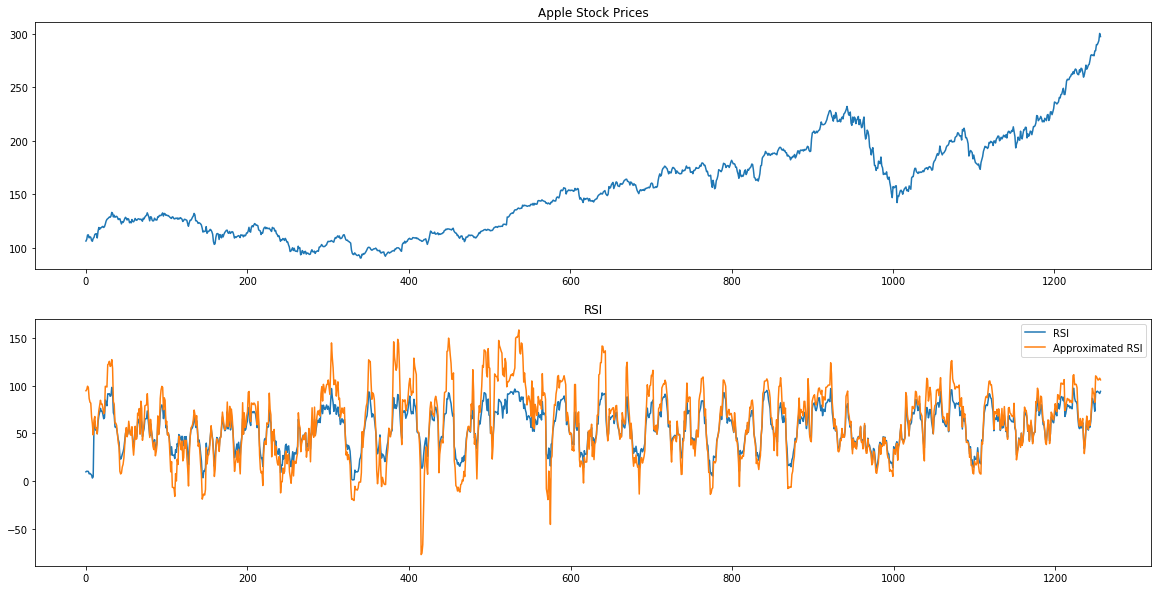

In [14]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (20, 10))

ax1.plot(apple)
ax1.set_title('Apple Stock Prices')

ax2.plot(apple_rsi, label='RSI')
ax2.plot(apple_rsi_approx, label='Approximated RSI')
ax2.set_title('RSI')
ax2.legend()

plt.show()

In [32]:
sins = sin_series(30)
sins_diff = diff(sins)
len(sins_diff)

29

In [33]:
sin_rsi_approx = []
for i in range(len(sins_diff)):
    sin_rsi_approx.append(rsi_approx(sins_diff, i, T))
len(sin_rsi_approx)

29

In [34]:
sin_rsi = []
for i in range(len(sins)):
    sin_rsi.append(rsi(sins, i, T))
sin_rsi = sin_rsi[1:]
len(sin_rsi)

29

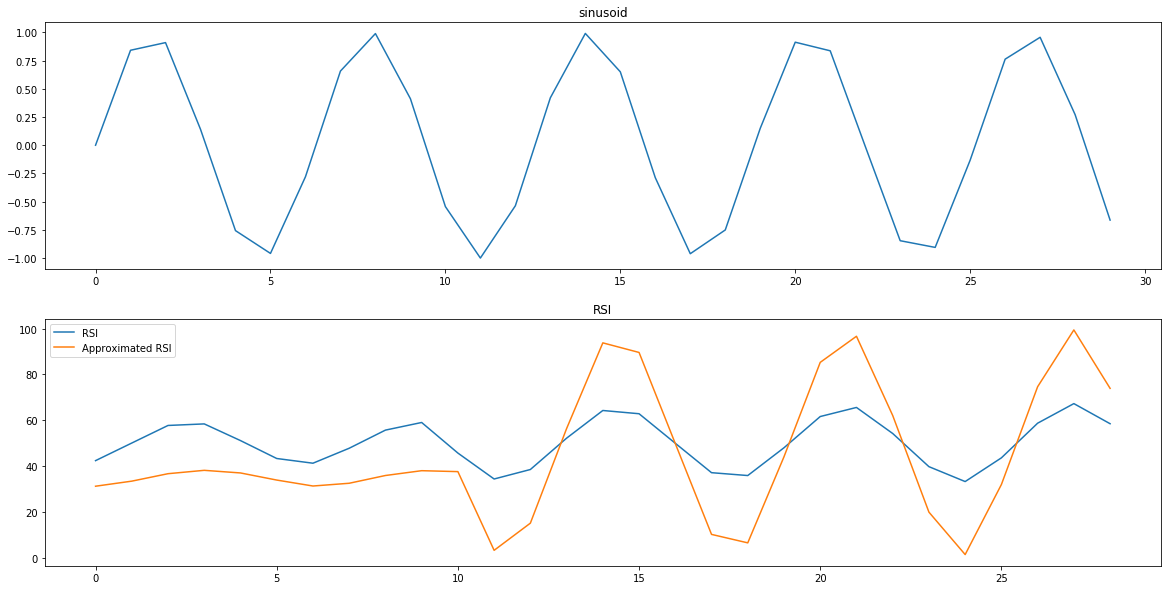

In [35]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (20, 10))

ax1.plot(sins)
ax1.set_title('sinusoid')

ax2.plot(sin_rsi, label='RSI')
ax2.plot(sin_rsi_approx, label='Approximated RSI')
ax2.set_title('RSI')
ax2.legend()

plt.show()